# **Backpropagation in CNN (Convolutional Neural Networks) – Full Explanation**

### **📌 What is Backpropagation?**
Backpropagation is a key **learning algorithm** that helps a neural network **adjust its weights** to reduce errors. In **CNNs**, backpropagation is used to update the **convolutional filters** (kernels) and weights in **fully connected layers** based on the error made by the model.



### **📌 Steps in Backpropagation for CNN**
Backpropagation in a CNN follows **four main steps**:

1. **Forward Propagation** (Compute Predictions)
2. **Compute Loss** (How wrong is the prediction?)
3. **Backward Propagation** (Calculate gradients)
4. **Update Weights** (Adjust kernels & weights)

Let’s break it down step by step in a **simple way**. 🚀



## **1️⃣ Forward Propagation (Making Predictions)**
- **Input Image**: The CNN receives an image as input.
- **Convolution Layers**: Filters (kernels) extract features (edges, textures).
- **Pooling Layers**: Reduce the feature map size.
- **Fully Connected Layers**: Convert feature maps into a final prediction.
- **Softmax / Sigmoid**: Outputs probabilities for classification.

✅ **Example**:  
If the CNN is classifying handwritten digits (MNIST), it outputs probabilities for each digit **(0-9)**.



## **2️⃣ Compute Loss (How Wrong is the Prediction?)**
- The CNN’s predicted output is compared to the **actual label** using a **loss function** (e.g., Cross-Entropy Loss for classification).
- The loss measures **how far the predicted output is from the true value**.

✅ **Example**:  
If the CNN predicts **7**, but the correct label is **5**, the loss is high.



## **3️⃣ Backward Propagation (Calculating Gradients)**
Now, the CNN needs to **adjust its filters and weights** so that the error decreases.  
This is done using the **chain rule of calculus** to compute gradients.

📌 **Key steps:**
1. **Calculate error in the output layer**:  
   - The **gradient of the loss function** tells us how much the error changes with respect to the output.
  
2. **Backpropagate through the fully connected layers**:  
   - The gradients flow backward to adjust weights.

3. **Backpropagate through the pooling & convolution layers**:  
   - Since pooling layers don’t have weights, only **convolution filters** get updated.
   - Gradients pass through **activation functions (ReLU, Tanh, etc.)**.

4. **Compute Gradients for Kernels (Filters)**:  
   - Each **filter** in a convolutional layer is updated based on the gradient.
   - Filters that detect important features (e.g., edges) get stronger.
   - Unimportant filters get weaker.

✅ **Example**:  
If a filter is responsible for detecting a **dog’s ear** but predicts **incorrectly**, the CNN reduces its influence.  
If another filter detects a **dog’s nose correctly**, it strengthens that filter.



## **4️⃣ Update Weights (Using Gradient Descent)**
- The computed gradients are used to **update the filters and weights**.
- The most common optimization algorithm is **Stochastic Gradient Descent (SGD) or Adam**:
  
  $$
  W_{\text{new}} = W_{\text{old}} - \eta \times \text{gradient}
  $$
  
  where **η (eta) is the learning rate**.

- This step **adjusts the CNN's filters** so that they learn better in the next iteration.

✅ **Example**:  
If the CNN made a mistake in detecting a cat’s eyes, after backpropagation, the filter responsible for detecting eyes gets **stronger**.

## **📌 Key Differences in Backpropagation in CNN vs ANN**
| Feature | ANN (Fully Connected) | CNN (Convolutional) |
|---------|-----------------------|---------------------|
| Weights to update | All neuron connections | Filters/Kernels in Conv layers |
| Error Calculation | Each neuron’s weight | Error backpropagates through convolution operations |
| Computation Cost | Lower | Higher (due to convolutional layers) |


## **🔹 Summary**
✅ **Backpropagation in CNNs** helps filters learn the best features by adjusting kernel weights.  
✅ It follows **Forward Pass → Loss Calculation → Backpropagation → Weight Update**.  
✅ **Gradient Descent** helps CNN improve its predictions.  
✅ CNNs are better at extracting spatial features than ANNs because **filters are updated** rather than just weights.



---

Yes, it's possible to manually calculate a **tiny** CNN example step by step. However, doing a full-fledged CNN manually is very complex due to the sheer number of calculations involved. But I can walk you through a **simplified example** where we calculate a single forward and backward pass for a small **convolutional layer** with a **1x1 filter** on a tiny input.  

Let's go step by step. 🚀  



## **📌 Example Setup**
We will use a **very small input**, a **single filter (kernel)**, and compute **one forward pass and one backward pass (gradient update).**  

🔹 **Input image (3x3 matrix):**
$$
X =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$
  
🔹 **Filter (Kernel) (2x2 matrix):**
$$
W =
\begin{bmatrix}
1 & 0 \\
-1 & 2
\end{bmatrix}
$$

🔹 **Stride = 1**, **No Padding**, **Learning Rate = 0.01**  
🔹 **Loss function:** Mean Squared Error (MSE)  



## **🔹 Step 1: Forward Pass (Convolution Operation)**
A **2×2 filter** slides over the input (stride = 1), multiplying values and summing them up.

### **Computing Convolution Outputs**
The filter applies on different 2×2 sections of the input:

#### **Top-left (First Window)**
$$
\begin{bmatrix}
1 & 2 \\
4 & 5
\end{bmatrix}
$$
Applying the filter:
$$
(1 \times 1) + (2 \times 0) + (4 \times -1) + (5 \times 2) = 1 + 0 - 4 + 10 = 7
$$

#### **Top-right (Second Window)**
$$
\begin{bmatrix}
2 & 3 \\
5 & 6
\end{bmatrix}
$$
$$
(2 \times 1) + (3 \times 0) + (5 \times -1) + (6 \times 2) = 2 + 0 - 5 + 12 = 9
$$

#### **Bottom-left (Third Window)**
$$
\begin{bmatrix}
4 & 5 \\
7 & 8
\end{bmatrix}
$$
$$
(4 \times 1) + (5 \times 0) + (7 \times -1) + (8 \times 2) = 4 + 0 - 7 + 16 = 13
$$

#### **Bottom-right (Fourth Window)**
$$
\begin{bmatrix}
5 & 6 \\
8 & 9
\end{bmatrix}
$$
$$
(5 \times 1) + (6 \times 0) + (8 \times -1) + (9 \times 2) = 5 + 0 - 8 + 18 = 15
$$

### **Convolution Output (Feature Map)**
$$
Y =
\begin{bmatrix}
7 & 9 \\
13 & 15
\end{bmatrix}
$$



## **🔹 Step 2: Compute Loss**
Assume the true output (ground truth) is:
$$
Y_{\text{true}} =
\begin{bmatrix}
6 & 8 \\
12 & 14
\end{bmatrix}
$$

Using **Mean Squared Error (MSE)**:
$$
\text{Loss} = \frac{1}{4} \sum (Y - Y_{\text{true}})^2
$$
$$
= \frac{1}{4} [(7-6)^2 + (9-8)^2 + (13-12)^2 + (15-14)^2]
$$
$$
= \frac{1}{4} [1 + 1 + 1 + 1] = \frac{4}{4} = 1
$$



## **🔹 Step 3: Backpropagation (Gradient Calculation)**
To update the filter, we compute **gradients of the loss with respect to the filter values**.

### **Compute Partial Derivative w.r.t Filter W**
Using **Chain Rule**:
$$
\frac{\partial \text{Loss}}{\partial W} = \frac{\partial \text{Loss}}{\partial Y} \times \frac{\partial Y}{\partial W}
$$

$$
\text{Gradient} = 2(Y - Y_{\text{true}})
$$
$$
= 2 \times
\begin{bmatrix}
(7-6) & (9-8) \\
(13-12) & (15-14)
\end{bmatrix}
= 2 \times
\begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix}
=
\begin{bmatrix}
2 & 2 \\
2 & 2
\end{bmatrix}
$$

Each weight in the **2x2 kernel W** gets a gradient value based on its contribution.



## **🔹 Step 4: Update Filter Weights**
Using Gradient Descent:
$$
W_{\text{new}} = W_{\text{old}} - \eta \times \text{Gradient}
$$
Given **learning rate** **η = 0.01**:
$$
W_{\text{new}} = W - 0.01 \times
\begin{bmatrix}
2 & 2 \\
2 & 2
\end{bmatrix}
$$

$$
W_{\text{new}} =
\begin{bmatrix}
1 & 0 \\
-1 & 2
\end{bmatrix}
-
\begin{bmatrix}
0.02 & 0.02 \\
0.02 & 0.02
\end{bmatrix}
$$

$$
=
\begin{bmatrix}
0.98 & -0.02 \\
-1.02 & 1.98
\end{bmatrix}
$$

🚀 **Updated Filter (W_new)**:
$$
\begin{bmatrix}
0.98 & -0.02 \\
-1.02 & 1.98
\end{bmatrix}
$$



## **🔹 Final Summary**
1️⃣ **Forward pass:** We performed convolution and obtained a **feature map**.  
2️⃣ **Computed loss:** Used MSE to measure error.  
3️⃣ **Backpropagation:** Found gradients for filters.  
4️⃣ **Updated filters:** Using **gradient descent**.  

This process repeats for **many iterations** until the filter learns the correct features.



## **🔹 Why is Manual Calculation Hard for Larger CNNs?**
- **Millions of parameters**: Real CNNs have hundreds of filters, and each filter is updated.
- **Matrix operations get complex**: Large images (e.g., 224×224) make calculations impractical by hand.
- **Backpropagation through multiple layers**: Deeper CNNs need backpropagation across convolutional, pooling, and fully connected layers.

But this small example gives you **a clear intuition** of how CNNs **adjust filters** through backpropagation.

---

### **Backpropagation in CNN – A Simple Layman Explanation** 🎨  

Alright, imagine training a Convolutional Neural Network (CNN) is like **teaching a child how to draw a perfect circle** 🎨.  

Every time the child tries to draw a circle, you compare it to a **perfect reference circle** and tell them how much they need to improve. The child then **adjusts their hand movements** a little each time, getting better and better.  

In CNN, this learning process is done by **Backpropagation**! Let's break it down into **super simple steps.** 🚀  



## **📌 Step 1: Forward Pass – Making a Prediction**
Think of the CNN as an **artistic robot** 🎨 that looks at an image and makes a prediction.  
👉 It **processes the image** through layers of filters (like looking at different details of the drawing).  
👉 It **gives an output** (e.g., "This is a cat" 🐱).  

But what if it's wrong? 🤔  



## **📌 Step 2: Compute the Error (Loss) – How Wrong Were We?**
We compare the robot’s prediction with the **actual answer**.  
💡 Example: The model predicts **"Dog 🐶"** but the real image is **"Cat 🐱"**.  

The difference between prediction and reality is called **"Loss" (Error).** The bigger the error, the worse our model is performing.  



## **📌 Step 3: Backpropagation – Learning from Mistakes**
Backpropagation is like giving **step-by-step drawing corrections** to the robot. 🖌️  

👉 We need to **find which part of the network made the mistake** – was it the filters? The final decision layer? The weights?  
👉 **Each filter (tiny detector in CNN) gets adjusted** based on how much it contributed to the mistake.  

Think of this like a teacher giving feedback:  
🎨 **"Your circle is too wobbly at the bottom – adjust your hand here!"**  
✏️ **"The top part is too flat, press a bit harder here!"**  

CNN does the same – it **adjusts each layer** little by little using **gradients.**  



## **📌 Step 4: Gradient Descent – Making Small Fixes**
Now, how do we adjust the mistakes? 🤔  
We use something called **Gradient Descent** (fancy term, but super simple concept).  

💡 Imagine you're **walking down a hill** in the dark 🌙.  
🔹 You **don’t jump all the way down** (too risky).  
🔹 Instead, you **take small steps** 🦶 in the direction that goes downhill.  
🔹 Eventually, you reach the **lowest point** (minimum error).  

CNN does the same! It updates the filter values **little by little** to **reduce the error**.  



## **📌 Step 5: Repeat Until It Gets Better**
CNN does this process **again and again** until the model learns to **accurately recognize objects**.  
🔄 **Forward pass → Compute loss → Backpropagation → Gradient update → Repeat!**  



## **🌟 Final Takeaway**
- CNN **predicts** (draws a circle).  
- CNN **compares** with the correct answer (sees mistakes).  
- CNN **adjusts** (fixes the mistakes with backpropagation).  
- CNN **learns over time** (just like a child practicing drawing!).  

After **thousands of trials**, the CNN gets **really good** at identifying objects correctly! 🎯  



### **🎨 Analogy Summary**
🔹 **Forward pass** → CNN **draws a picture**.  
🔹 **Compute loss** → We **check how wrong it is**.  
🔹 **Backpropagation** → We **find and correct mistakes**.  
🔹 **Gradient Descent** → We **make small improvements**.  
🔹 **Repeat until perfect!**  

This is how CNN **learns step by step**, just like a **child learning to draw a perfect shape**. 🖌️✨  

---

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1252 - accuracy: 0.9625 - val_loss: 0.0419 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0315 - val_accuracy: 0.9901
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0295 - val_accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0292 - accuracy: 0.9910
Test accuracy: 0.9910


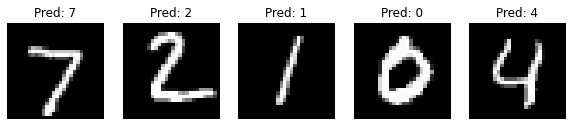

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to add a channel dimension (needed for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define a CNN model (LeNet-5 inspired)
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predict on test samples
predictions = model.predict(x_test[:5])

# Plot some test images with predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()


Of course! Let me explain your CNN model in **super simple** terms.  



### **Imagine your CNN is like a detective solving a case 🕵️‍♂️**  
Your job is to recognize a **number (0-9) from a blurry image**.  
To do this, you go through the following steps:



### **1️⃣ First Convolutional Layer (Looking for Small Clues 🔍)**
```python
layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))
```
✅ This layer **scans** the image **piece by piece (3×3 filters)**  
✅ It **looks for tiny details** like **edges, curves, and corners**  
✅ **Example:** It finds a curved line → Maybe it’s part of the number 3 or 8?



### **2️⃣ First Pooling Layer (Keeping the Important Stuff ✅)**
```python
layers.MaxPooling2D(pool_size=(2,2))
```
✅ Think of this like a **zoom-out button** 📏  
✅ It keeps only the **strongest clues** and removes unnecessary details  
✅ This **reduces the image size** but still **keeps the most important parts**  
✅ **Example:** It ignores noise but keeps the main shape of the digit



### **3️⃣ Second Convolutional Layer (Finding Bigger Patterns 📊)**
```python
layers.Conv2D(64, kernel_size=(3,3), activation='relu')
```
✅ Now, the detective **focuses on bigger features**  
✅ Maybe it finds a **loop** → Could be a 6, 8, or 9?  
✅ It uses **64 filters** to recognize more complex patterns  



### **4️⃣ Second Pooling Layer (Another Zoom-Out 🔍)**
```python
layers.MaxPooling2D(pool_size=(2,2))
```
✅ Again, we **reduce the size** but **keep the most important details**  
✅ **Example:** The model now clearly sees a loop → It's probably a 6 or 8!



### **5️⃣ Flatten Layer (Turning Image into a List 📋)**
```python
layers.Flatten()
```
✅ Now, we **unroll the image** into a long list of numbers  
✅ Imagine writing down **all clues in a notebook** before making a final decision  



### **6️⃣ Fully Connected Layer (Making a Smart Guess 🧠)**
```python
layers.Dense(128, activation='relu')
```
✅ This layer **connects all clues together**  
✅ It tries to match the clues with known patterns  
✅ **Example:** If it sees a straight line and a loop → It might be a 9!  



### **7️⃣ Output Layer (Final Answer! 🎯)**
```python
layers.Dense(10, activation='softmax')
```
✅ There are **10 possible answers (0-9)**  
✅ The model **chooses the most likely number**  
✅ **Example:** "I'm 90% sure this is a 9 and 10% sure it's a 3"  



### **Final Analogy 🎭**
Think of this process like **recognizing a friend in a blurry photo**:  
1. 👀 **Step 1:** You **scan** the image, looking for familiar features.  
2. 🔍 **Step 2:** You **focus on the most important parts** (face, clothes).  
3. 🧩 **Step 3:** You **connect the clues** (glasses, hairstyle, etc.).  
4. 🎯 **Step 4:** You **make a final decision**: "Oh, this must be Alex!"  



### **Now, your CNN does the same for numbers!**
It **detects tiny features**, **filters out noise**, **combines patterns**, and **makes a smart guess** 🔥  

I hope this makes it **super clear now**! 😊 Let me know if you need **even more simplification**! 🚀

---